<a href="https://colab.research.google.com/github/nabuulek/Flight-Delay-Prediction/blob/main/Flight_Pred_model_Kevin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train.csv")
df.set_index("ID", inplace=True)

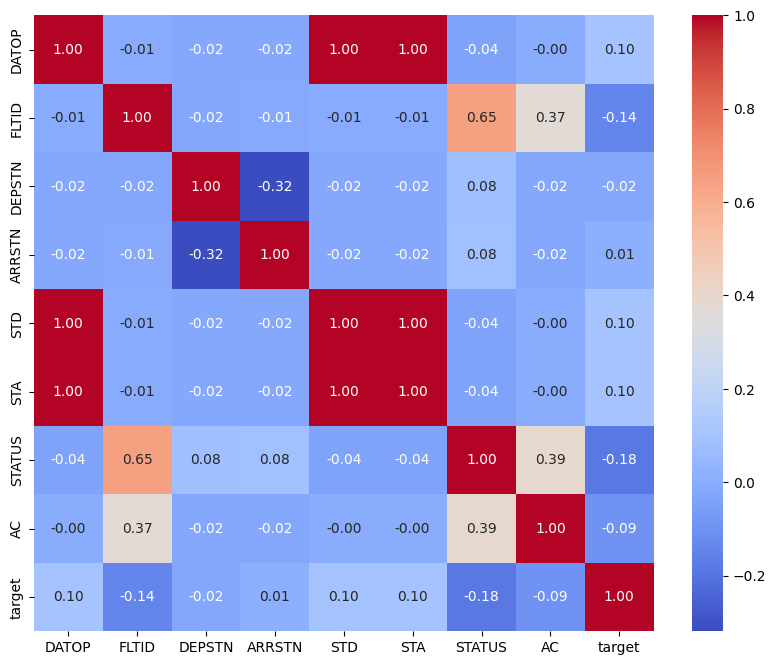

In [ ]:

df_encoded_corr = df.apply(LabelEncoder().fit_transform)
correlation_matrix = df_encoded_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
df['DATOP'] = pd.to_datetime(df['DATOP'])

# Extract features from the date
df['day_of_week'] = df['DATOP'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['DATOP'].dt.month
df['year'] = df['DATOP'].dt.year

# Drop the original "date of flight" column
df.drop('DATOP', axis=1, inplace=True)

In [ ]:
# Convert the STA and STD columns to datetime format
df['STA']=df['STA'].str.rstrip(',')
df['STD']=df['STD'].str.rstrip(',')

df['STA']=pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')
df['STD']=pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')

# Extract hour and minute features from the STA and STD columns
df['arrival_hour'] = df['STA'].dt.hour
df['arrival_minute'] = df['STA'].dt.minute
df['departure_hour'] = df['STD'].dt.hour
df['departure_minute'] = df['STD'].dt.minute

df['flight_duration']=df['STD']-df['STA']
df['flight_duration']=df['flight_duration'].dt.total_seconds()

# Drop the original STA and STD columns
df.drop(['STA', 'STD'], axis=1, inplace=True)


In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
#separate features from the target variable
X=df.drop(["target"], axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:

def evaluate_model(model, X_test, y_test):
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2

rmse, r2 = evaluate_model(model, X_test, y_test)
print("RMSE_1:", rmse)
print("R2_1:", r2)


RMSE_1: 93.20995288343492
R2_1: 0.06959204063642621


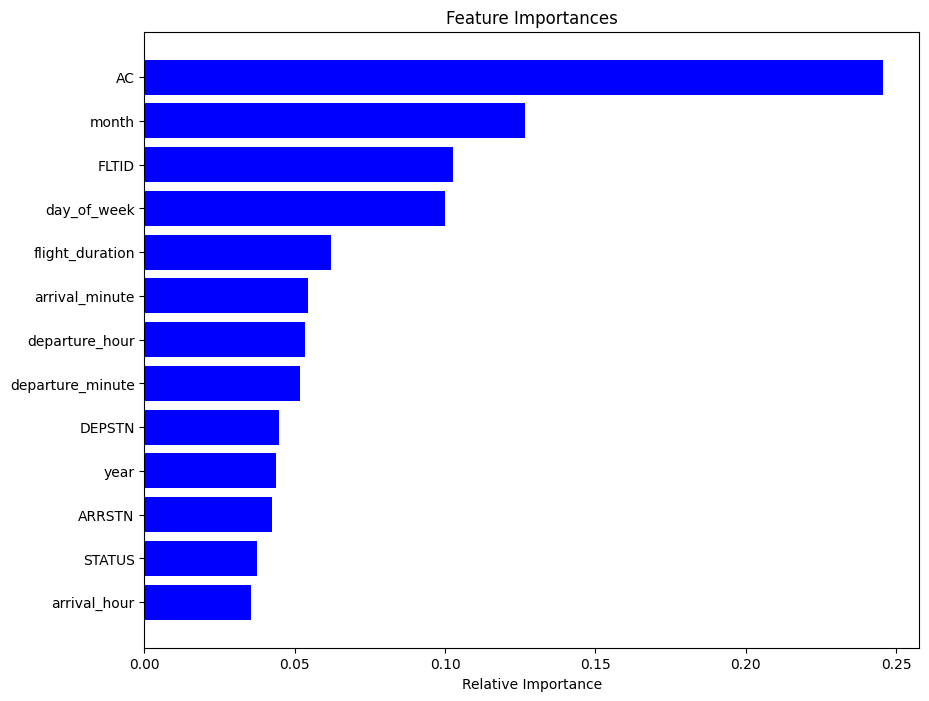

In [ ]:

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

rmse, r2 = evaluate_model(reg, X_test, y_test)
print("RMSE_2:", rmse)
print("R2_2:", r2)

RMSE_2: 94.37731416798515
R2_2: 0.046141250388527566


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

rmse, r2 = evaluate_model(gb, X_test, y_test)
print("RMSE_3:", rmse)
print("R2_3:", r2)

RMSE_3: 92.12137375944789
R2_3: 0.09119721004936576


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

rmse, r2 = evaluate_model(knn, X_test, y_test)
print("RMSE_4:", rmse)
print("R2_4:", r2)

RMSE_4: 97.07236488654902
R2_4: -0.009113602299114731


In [ ]:
y_pred=model.predict(X_test)
y_pred= y_pred.round().astype(int)

In [ ]:
submission = pd.DataFrame({"Test": y_test, "Predictions": y_pred})

In [ ]:
submission.head()

In [ ]:
submission.rename(columns={'Predictions': 'target'}, inplace=True)
del submission['Test']

In [ ]:
sub_file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SampleSubmission.csv")

In [ ]:
sub_file.set_index("ID", inplace=True)

In [ ]:
final_submission = pd.concat([submission,sub_file],axis = 0)
final_submission.to_csv('submit.csv',index = True)

In [ ]:
final_submission.head()